In [2]:
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import tarfile
from urllib.request import urlopen

In [49]:
url = 'https://ndownloader.figshare.com/files/5976036'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

In [50]:
with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

    value = housing[:, -1]
    print(housing[:, [4, 7]])



[[ 129.        8.3252]
 [1106.        8.3014]
 [ 190.        7.2574]
 ...
 [ 485.        1.7   ]
 [ 409.        1.8672]
 [ 616.        2.3886]]


In [31]:
housing.

(20640, 9)

In [28]:
pop


array([ 129., 1106.,  190., ...,  485.,  409.,  616.])

In [29]:
age

array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886])

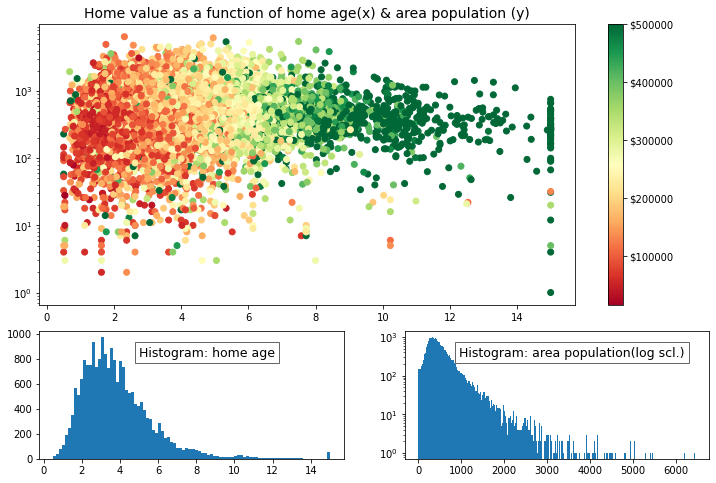

In [20]:
def add_innerbox(ax, text):
    ax.text(.55, .8, text,
           horizontalalignment='center',
           transform=ax.transAxes,
           bbox=dict(facecolor='white', alpha=0.6),
           fontsize=12.5)

gridsize = (3,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0,0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2,0))
ax3 = plt.subplot2grid(gridsize, (2,1))

ax1.set_title('Home value as a function of home age(x) & area population (y)',
             fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=value, cmap ='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_innerbox(ax2, 'Histogram: home age')
add_innerbox(ax3, 'Histogram: area population(log scl.)')
plt.show()

